In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# single

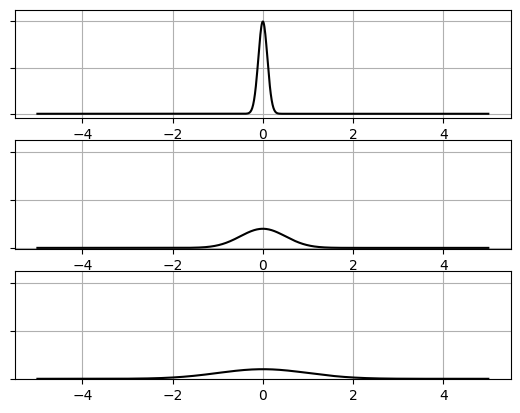

In [40]:
x = np.linspace(-5, 5, 1000)
fig, axs = plt.subplots(3,1, subplot_kw=dict(yticklabels=[]))
for ax, stddev in zip(axs, [0.1, 0.5, 1]):
    rv = scipy.stats.norm(0,stddev)
    ax.plot(x, rv.pdf(x), c='k')
    ax.grid()
    ax.set_ylim(None, 4.5)

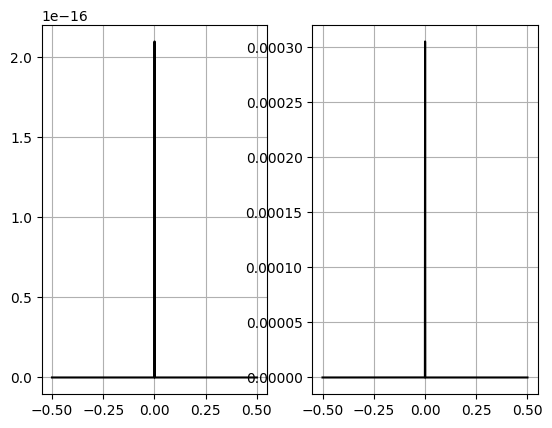

In [21]:
datapoint = np.array([0,0.0001])
x = np.linspace(-0.5, 0.5, 1000)

fig, axs = plt.subplots(1,2)
for ax, bw in zip(axs, [0.6, 1]):
    kde = scipy.stats.gaussian_kde(datapoint, bw_method=bw)
    ax.plot(x, kde(x), c='k')
    ax.grid()

# Multi

In [48]:
np.random.seed(40)
dataset_a = np.random.normal(0,0.1, size=10)
dataset_b = np.random.normal(1,0.1, size=10)
dataset = np.concat([dataset_a, dataset_b])
dataset_noisy = dataset + np.clip(np.random.normal(0, 0.005, size=len(dataset)), -0.005, 0.005)

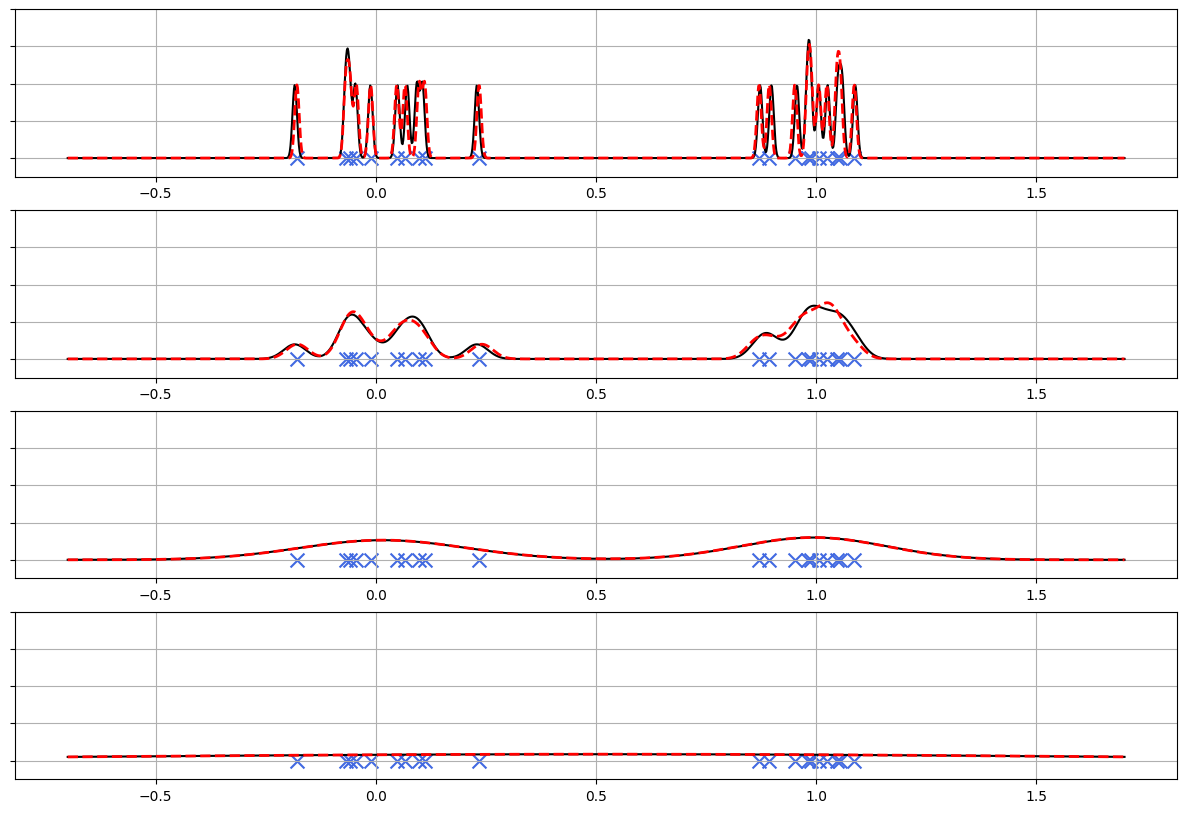

In [62]:
fig, axs = plt.subplots(4,1, figsize=(15,10), subplot_kw=dict(ylim=(-1, 8), yticklabels=[]))
epsilon = 0.2
x = np.linspace(-0.5 - epsilon, 1.5 + epsilon, 1500)

for ax, bw in zip(axs.flatten(), [0.01, 0.05, 0.3, 2.]):
    kde = scipy.stats.gaussian_kde(dataset, bw_method=bw)
    density = kde(x)
    ax.plot(x, density, c='k')
    ax.plot()
    ax.grid()
    if True:
        ax.scatter(dataset_noisy, np.zeros(len(dataset)), c='royalblue', marker='x', s=100)
        if bw == 0.05:
            _dataset_noisy = dataset_noisy + np.random.normal(0, 0.008, size=len(dataset))
            kde = scipy.stats.gaussian_kde(_dataset_noisy, bw_method=bw)
        else:
            kde = scipy.stats.gaussian_kde(dataset_noisy, bw_method=bw)
        density = kde(x)
        ax.plot(x, density, c='red', linestyle='--', linewidth=2)
    